## Basic Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## Read in the data

In [5]:
## List of tables

conn = sqlite3.connect('C:/Users/ritik/PycharmProjects/DataAnalysisProjects/Zomato Project/zomato_rawdata.sqlite')


cursor = conn.cursor()

# Execute the SQL command to get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the results
tables = cursor.fetchall()

# Print the list of tables
for table in tables:
    print(table[0])

Users


In [6]:
query = 'Select * from Users;'
df = pd.read_sql_query(query, conn)
df

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,None,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,None,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,None,0,None,Whitefield,Bar,None,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


## Data Cleaning

In [13]:
df.isnull().sum()/df.shape[0]

index                          0.000000
url                            0.000000
address                        0.000000
name                           0.000000
online_order                   0.000000
book_table                     0.000000
rate                           0.150337
votes                          0.000000
phone                          0.023358
location                       0.000406
rest_type                      0.004389
dish_liked                     0.542916
cuisines                       0.000870
approx_cost(for two people)    0.006690
reviews_list                   0.000000
menu_item                      0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

### Clean the rate column

In [7]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
df['rate'].replace(r'NEW|-',np.nan, regex=True, inplace=True)

In [9]:
def splitter(x):
    try:
        var = x.split('/')[0]
        return float(var)
    except:
        return x
df['rate'] = df['rate'].apply(lambda x : splitter(x))

## Relationship between online ordering and rating

In [27]:
df['online_order'].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [29]:
pivot_table = pd.pivot_table(data=df, index='rate', columns='online_order', values='index', aggfunc='count', fill_value=0)
pivot_table.head()

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22


In [43]:
no_prop = df[df['online_order'] == 'No'].shape[0] / df['online_order'].value_counts().sum()
yes_prop = df[df['online_order'] == 'Yes'].shape[0] / df['online_order'].value_counts().sum()

In [44]:
no_prop

0.41133476419745924

In [45]:
pivot_table = pivot_table.multiply([1 - no_prop,1 - yes_prop])

In [46]:
pivot_table

online_order,No,Yes
rate,,
1.8,1.210692,0.000000
2.0,2.663523,0.000000
2.1,2.179246,2.537944
2.2,2.421385,2.707141
2.3,7.022016,3.722318
2.4,8.716985,5.752674
2.5,9.201262,10.659366
2.6,20.097494,29.947743
2.7,34.141525,28.086584


In [47]:
normalized_table = pivot_table.apply(lambda x : 100*x/x.sum(), axis=1)

In [48]:
normalized_table

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,46.197970,53.802030
2.2,47.214054,52.785946
2.3,65.355523,34.644477
2.4,60.243197,39.756803
2.5,46.329159,53.670841
2.6,40.158654,59.841346
2.7,54.865118,45.134882


Text(0.5, 1.0, 'Rating Distribution for Online Orders')

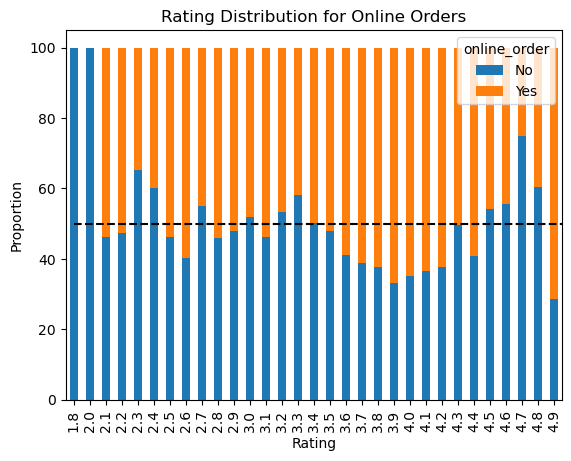

In [49]:
normalized_table.plot(kind='bar', stacked=True)
plt.hlines(50, 0,50, colors='k', linestyles='dashed')
plt.ylabel('Proportion')
plt.xlabel('Rating')
plt.title('Rating Distribution for Online Orders')

#### Based on the stacked chart, ratings below 3.5 are distributed fairly evenly between online and in store orders, while online order look better between 3.5 and 4.3 and they are both fairly even on the high rating side. With the proportions not being to extreme for the majority of the ratings, there seems to be no relationship between online and in store orders when compared to ratings.

## Cleaning the reviews

In [50]:
restaurant_df = df.dropna(subset=['rest_type'])

In [51]:
quick_bites_df = restaurant_df[restaurant_df['rest_type'].str.contains('Quick Bites')]

In [52]:
quick_bites_df.shape

(20639, 18)

In [53]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x : str(x).lower())

C:\Users\ritik\AppData\Local\Temp\ipykernel_18644\1978673035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x : str(x).lower())


In [54]:
quick_bites_df['reviews_list']

3        [('rated 4.0', "rated\n  great food and proper...
23       [('rated 4.0', "rated\n  so, went here with fr...
26       [('rated 5.0', 'rated\n  please provide some e...
31       [('rated 1.0', "rated\n  worst restaurant ever...
34       [('rated 3.0', 'rated\n  not worth for the mon...
                               ...                        
51641    [('rated 2.0', "rated\n  food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('rated 5.0', "rated\n  i was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [55]:
from nltk.corpus import RegexpTokenizer
tokenizer = RegexpTokenizer('[a-zA-z]+')
' '.join(tokenizer.tokenize(quick_bites_df['reviews_list'][3]))

'[ rated rated\\n great food and proper karnataka style full meals been there twice and was fully satisfied will give stars if it s well managed rated rated\\n reached the place at pm on saturday half of the items on the menu were over what was annoying was is the food was cold the taste was also very average only dosa and holige were good there were very few people in the restaurant and the service was still very slow the waiters were all standing in one corner and talking had to call them repeatedly rated rated\\n had been here good food served and tasty good place to go with freinds and family should be first to get served well with all food one of the good hotel there for this price rated rated\\n how can a udupi restaurant be so dirty the floor the walls the waiters are all stained in food why cant they clean it the floor even had decorative colour paper every where and lot of food now coming to the taste of the food it was pretty decent for what they chargw what upset us was the 

In [56]:
reviews_tokens = quick_bites_df['reviews_list'].apply(tokenizer.tokenize)

In [57]:
import string
from nltk.corpus import stopwords

In [60]:
stop_words = stopwords.words('english')
stop_words.extend(list(string.punctuation))
stop_words.extend(['[',']','rated', 'rated\\n','\\x'])

In [61]:
reviews_tokens_clean = reviews_tokens.apply(lambda x : [word for word in x if word not in stop_words]) 

In [62]:
reviews_tokens_clean

3        [great, food, proper, karnataka, style, full, ...
23       [went, friends, tea, ambience, striking, say, ...
26       [please, provide, extra, sambal, quantity, les...
31       [worst, restaurant, ever, veg, manchurian, wor...
34       [worth, money, pay, ambience, good, enough, se...
                               ...                        
51641    [food, upto, mark, \nquantity, food, little, \...
51642                                                 [[]]
51643                                                 [[]]
51644                                                 [[]]
51645    [randomly, looking, zomato, burger, show, rest...
Name: reviews_list, Length: 20639, dtype: object

## Unary Analysis


In [63]:
total_reviews = [item for review in reviews_tokens_clean for item in review]

In [64]:
from collections import Counter
from nltk import FreqDist
counter = Counter(total_reviews)
fd = FreqDist(counter)

<Axes: xlabel='word'>

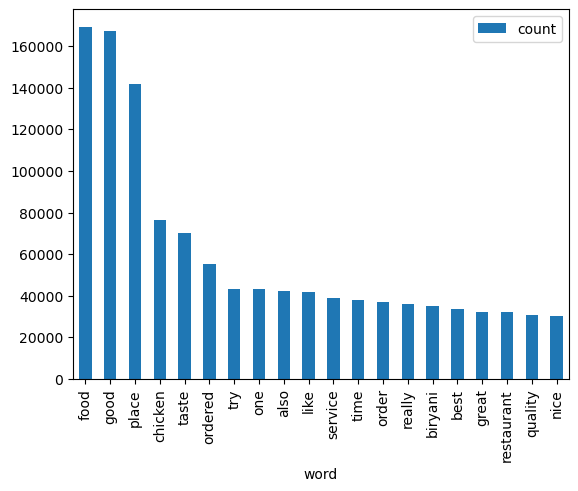

In [93]:
unary_df = pd.DataFrame(fd.most_common(20))
unary_df.columns = ['word','count']
unary_df.set_index('word', inplace=True)
unary_df.plot(kind='bar')

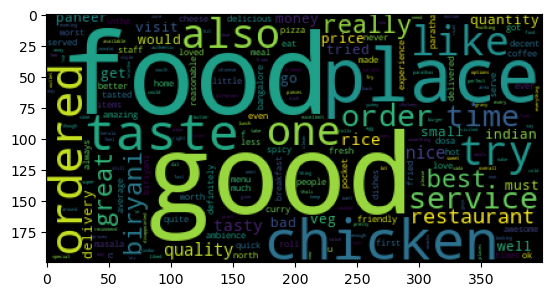

In [71]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(dict(counter))
plt.imshow(wordcloud)

#### Based on the visualizations, food, good, and place appear the most in the reviews. There does not seem to be any negative words in the top 20, but expanding from words to combination of words will help answer the question.

## Bigram and Trigram Analysis

In [95]:
from nltk import bigrams

items = list(bigrams(total_reviews))
bigram_fd = FreqDist(items)

In [98]:
bigram_df = pd.DataFrame(bigram_fd.most_common(10))

<Axes: xlabel='word'>

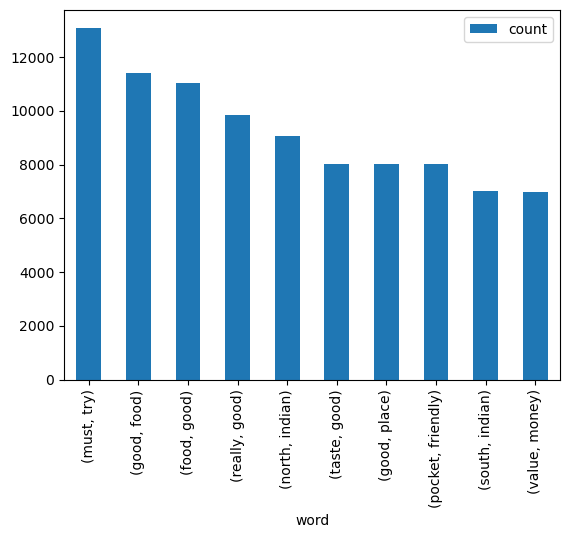

In [99]:
bigram_df.columns = ['word','count']
bigram_df.set_index('word', inplace=True)
bigram_df.plot(kind='bar')

#### Based on the bigram analysis, the word combinations for the top 10 are positive. The quick bite restaurants seem to perform well.

In [100]:
from nltk import trigrams
items = list(trigrams(total_reviews))
trigram_fd = FreqDist(items)

<Axes: xlabel='word'>

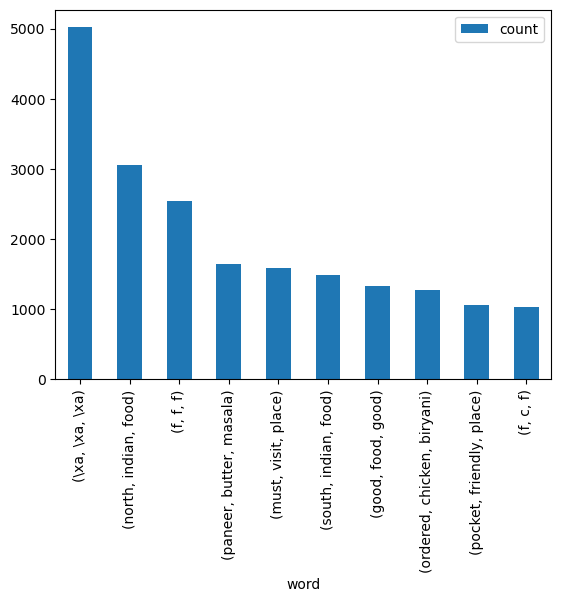

In [101]:
trigram_df = pd.DataFrame(trigram_fd.most_common(10))
trigram_df.columns = ['word','count']
trigram_df.set_index('word', inplace=True)
trigram_df.plot(kind='bar')

In [102]:
trigram_fd.most_common(30)

[(('\\xa', '\\xa', '\\xa'), 5019),
 (('north', 'indian', 'food'), 3056),
 (('f', 'f', 'f'), 2550),
 (('paneer', 'butter', 'masala'), 1638),
 (('must', 'visit', 'place'), 1594),
 (('south', 'indian', 'food'), 1484),
 (('good', 'food', 'good'), 1329),
 (('ordered', 'chicken', 'biryani'), 1273),
 (('pocket', 'friendly', 'place'), 1057),
 (('f', 'c', 'f'), 1034),
 (('chicken', 'fried', 'rice'), 1033),
 (('food', 'really', 'good'), 1011),
 (('[]', '[]', '[]'), 1000),
 (('veg', 'non', 'veg'), 992),
 (('worst', 'food', 'ever'), 937),
 (('must', 'try', 'place'), 895),
 (('like', 'home', 'made'), 889),
 (('good', 'taste', 'good'), 819),
 (('south', 'indian', 'breakfast'), 816),
 (('good', 'value', 'money'), 778),
 (('home', 'made', 'food'), 759),
 (('food', 'reasonable', 'price'), 740),
 (('good', 'quality', 'food'), 729),
 (('ghar', 'ka', 'khana'), 693),
 (('keep', 'good', 'work'), 692),
 (('taste', 'really', 'good'), 686),
 (('home', 'cooked', 'food'), 651),
 (('quality', 'food', 'good'), 648

#### Trigram analysis further proves the restaurant is performing well. Some bad data like the (\\xa, \\xa, \\xa) and (f,f,f) are present, but the looking at the top 30, our observation still holds

## Plot restaurants on the map

### Obtain geographical coordinates

In [153]:
location_df = df.dropna(subset=['location'])
location_df['location'] = location_df['location'] + " , Bangalore  , Karnataka , India "

In [154]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="app", timeout=None)
lat = []
long = []
for location in location_df['location'].unique():
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        long.append(np.nan)
    else:
        lat.append(location.latitude)
        long.append(location.longitude)

In [155]:
locations = pd.DataFrame(location_df['location'].unique())
locations['latitude'] = lat
locations['longitude'] = long
locations.rename(columns={0:'name'},inplace=True)
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.939333,77.553982
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.960494,77.556961
3,"Jayanagar , Bangalore , Karnataka , India",12.941849,77.586898
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.009476,77.553089
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [156]:
locations[locations['latitude'].isna() | locations['longitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


##### Since the latitude and logitude for these two locations are null, I will manually search them and append their locations

In [141]:
import warnings
warnings.filterwarnings('ignore')

In [157]:
locations['longitude'][79] = 13.0163
locations['latitude'][79]=77.6785
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

### Get the number of north indian restaurants for each locations and join them to the loaction table

In [158]:
df['cuisines'].isnull().sum()
north_india = df.dropna(subset='cuisines')
north_india = north_india[north_india['cuisines'].str.contains("North Indian")]

In [159]:
north_india_counts = north_india['location'].value_counts().reset_index().rename(columns={'location':'name'})

In [160]:
north_india_counts.columns = ['name','count']
north_india_counts['name'] = north_india_counts['name'] + " , Bangalore  , Karnataka , India "

In [163]:
heatmap_df = locations.merge(north_india_counts, on='name', how='left')
heatmap_df.dropna(subset='count', inplace=True)

In [164]:
heatmap_df

,name,latitude,longitude,count
0,"Banashankari , Bangalore , Karnataka , India",12.939333,77.553982,309.0
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502,189.0
2,"Mysore Road , Bangalore , Karnataka , India",12.960494,77.556961,11.0
3,"Jayanagar , Bangalore , Karnataka , India",12.941849,77.586898,664.0
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.906768,77.559502,98.0
...,...,...,...,...
87,"Yeshwantpur , Bangalore , Karnataka , India",13.023830,77.552921,72.0
88,"West Bangalore , Bangalore , Karnataka , India",13.009476,77.553089,1.0
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356,12.0
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061,13.0


### Use Folium heatmap to show restaurants on a global map.

In [166]:
import folium
from folium.plugins import HeatMap

In [171]:
# Create a base map centered around the mean latitude and longitude
basemap = folium.Map(location=[heatmap_df['latitude'].mean(), heatmap_df['longitude'].mean()], zoom_start=4)
basemap

In [172]:
# Convert DataFrame to list of tuples (latitude, longitude, count)
heat_data = heatmap_df[['latitude','longitude','count']]

# Add heatmap layer to the base map
HeatMap(heat_data).add_to(basemap)

In [208]:
basemap.save('north_indian_heatmap.html')
basemap

## Function for generating heatmap

In [206]:
import folium
from folium.plugins import HeatMap

def getHeatMap(cuisine):
    cuisine_df = df.dropna(subset='cuisines')
    cuisine_df = cuisine_df[cuisine_df['cuisines'].str.contains(cuisine)]
    cuisine_df_counts = cuisine_df['location'].value_counts()
    cuisine_df_counts = cuisine_df_counts.to_frame().reset_index()
    cuisine_df_counts.columns = ['name', 'count']
    cuisine_df_counts['name'] = cuisine_df_counts['name'] + " , Bangalore  , Karnataka , India "
    heatmap_df = locations.merge(cuisine_df_counts, on='name', how='left')
    heatmap_df.dropna(subset='count', inplace=True)
    basemap = folium.Map(location=[heatmap_df['latitude'].mean(), heatmap_df['longitude'].mean()], zoom_start=4)
    heat_data = heatmap_df[['latitude','longitude','count']]
    HeatMap(heat_data).add_to(basemap)
    print(heat_data.head())
    basemap.save(cuisine + '_heatmap.html')
    return basemap
    

In [207]:
getHeatMap('Chinese')

    latitude  longitude  count
0  12.939333  77.553982  259.0
1  12.941726  77.575502  156.0
2  12.960494  77.556961    9.0
3  12.941849  77.586898  570.0
4  12.906768  77.559502   99.0
